### Ejercicio 2

**Datos:**

| xi   | 0.2     | 0.3     | 0.6     | 0.9     | 1.1     | 1.3     | 1.4     | 1.6     |
|------|---------|---------|---------|---------|---------|---------|---------|---------|
| yi   | 0.05045 | 0.09843 | 0.33277 | 0.72660 | 1.09720 | 1.56970 | 1.84870 | 2.50150 |

**Instrucciones:**

Repita el ejercicio anterior para estos datos:

a. Construya el polinomio por mínimos cuadrados de grado 1 y calcule el error.  
b. Construya el polinomio por mínimos cuadrados de grado 2 y calcule el error.  
c. Construya el polinomio por mínimos cuadrados de grado 3 y calcule el error.  
d. Construya el modelo por mínimos cuadrados de la forma \( y = b x^a \) y calcule el error.  
e. Construya el modelo por mínimos cuadrados de la forma \( y = b^x \) y calcule el error.  

=== RESULTADOS EJERCICIO 2 ===

a. Ajuste lineal (grado 1):
Ecuación: y = 1.6655x + -0.5125
Error cuadrático medio: 0.041949

b. Ajuste cuadrático (grado 2):
Ecuación: y = 1.1294x² + -0.3114x + 0.0851
Error cuadrático medio: 0.000302

c. Ajuste cúbico (grado 3):
Ecuación: y = 0.2662x³ + 0.4029x² + 0.2484x + -0.0184
Error cuadrático medio: 0.000001

d. Ajuste no lineal bx^a:
Ecuación: y = 0.9055 * x^2.1428
Error cuadrático medio: 0.000436

e. Ajuste no lineal bx^b:
Ecuación: y = 1.2271 * x^1.2271
Error cuadrático medio: 0.058827


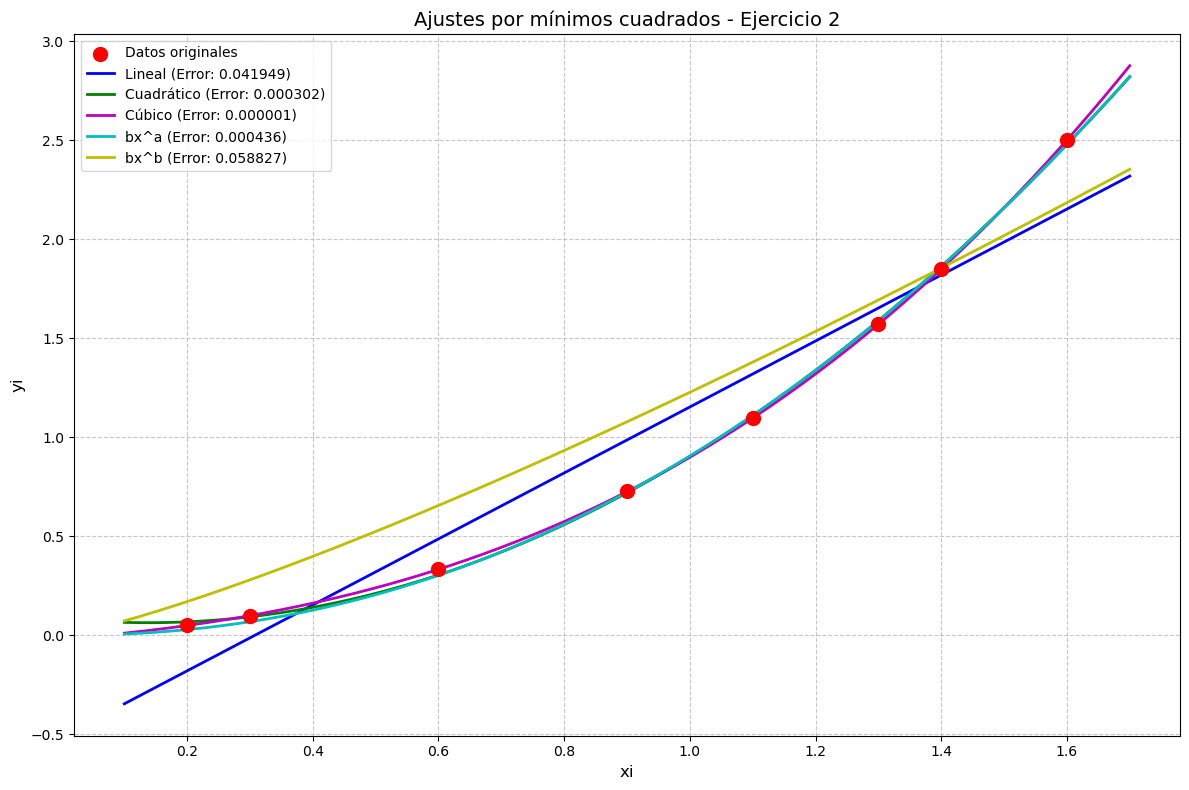

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Función para calcular el error cuadrático medio
def calcular_error(y_real, y_pred):
    return np.mean((y_real - y_pred)**2)

# Datos del ejercicio 2
xi = np.array([0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6])
yi = np.array([0.050446, 0.098426, 0.33277, 0.72660, 1.0972, 1.5697, 1.8487, 2.5015])

# a. Ajuste lineal (polinomio de grado 1)
coef1 = np.polyfit(xi, yi, 1)
p1 = np.poly1d(coef1)
y_pred1 = p1(xi)
error1 = calcular_error(yi, y_pred1)

# b. Ajuste cuadrático (polinomio de grado 2)
coef2 = np.polyfit(xi, yi, 2)
p2 = np.poly1d(coef2)
y_pred2 = p2(xi)
error2 = calcular_error(yi, y_pred2)

# c. Ajuste cúbico (polinomio de grado 3)
coef3 = np.polyfit(xi, yi, 3)
p3 = np.poly1d(coef3)
y_pred3 = p3(xi)
error3 = calcular_error(yi, y_pred3)

# d. Ajuste no lineal de la forma bx^a
def modelo_d(x, b, a):
    """Modelo no lineal de la forma y = b * x^a"""
    return b * x**a

# Ajuste del modelo con valores iniciales razonables
params_d, _ = curve_fit(modelo_d, xi, yi, p0=[1, 2])
y_pred_d = modelo_d(xi, *params_d)
error_d = calcular_error(yi, y_pred_d)

# e. Ajuste no lineal de la forma bx^b (asumiendo que es un caso especial del anterior donde a = b)
def modelo_e(x, b):
    """Modelo no lineal de la forma y = b * x^b"""
    return b * x**b

params_e, _ = curve_fit(modelo_e, xi, yi, p0=[1])
y_pred_e = modelo_e(xi, *params_e)
error_e = calcular_error(yi, y_pred_e)

# Crear figura para los gráficos
plt.figure(figsize=(12, 8))

# Graficar los datos originales
plt.scatter(xi, yi, color='red', s=100, label='Datos originales', zorder=5)

# Generar valores para las curvas ajustadas
x_vals = np.linspace(min(xi)-0.1, max(xi)+0.1, 500)

# Graficar cada modelo ajustado
plt.plot(x_vals, p1(x_vals), 'b-', linewidth=2, 
         label=f'Lineal (Error: {error1:.6f})')
plt.plot(x_vals, p2(x_vals), 'g-', linewidth=2, 
         label=f'Cuadrático (Error: {error2:.6f})')
plt.plot(x_vals, p3(x_vals), 'm-', linewidth=2, 
         label=f'Cúbico (Error: {error3:.6f})')
plt.plot(x_vals, modelo_d(x_vals, *params_d), 'c-', linewidth=2, 
         label=f'bx^a (Error: {error_d:.6f})')
plt.plot(x_vals, modelo_e(x_vals, *params_e), 'y-', linewidth=2, 
         label=f'bx^b (Error: {error_e:.6f})')

# Configuración del gráfico
plt.title('Ajustes por mínimos cuadrados - Ejercicio 2', fontsize=14)
plt.xlabel('xi', fontsize=12)
plt.ylabel('yi', fontsize=12)
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar resultados numéricos
print("=== RESULTADOS EJERCICIO 2 ===")
print("\na. Ajuste lineal (grado 1):")
print(f"Ecuación: y = {coef1[0]:.4f}x + {coef1[1]:.4f}")
print(f"Error cuadrático medio: {error1:.6f}")

print("\nb. Ajuste cuadrático (grado 2):")
print(f"Ecuación: y = {coef2[0]:.4f}x² + {coef2[1]:.4f}x + {coef2[2]:.4f}")
print(f"Error cuadrático medio: {error2:.6f}")

print("\nc. Ajuste cúbico (grado 3):")
print(f"Ecuación: y = {coef3[0]:.4f}x³ + {coef3[1]:.4f}x² + {coef3[2]:.4f}x + {coef3[3]:.4f}")
print(f"Error cuadrático medio: {error3:.6f}")

print("\nd. Ajuste no lineal bx^a:")
print(f"Ecuación: y = {params_d[0]:.4f} * x^{params_d[1]:.4f}")
print(f"Error cuadrático medio: {error_d:.6f}")

print("\ne. Ajuste no lineal bx^b:")
print(f"Ecuación: y = {params_e[0]:.4f} * x^{params_e[0]:.4f}")
print(f"Error cuadrático medio: {error_e:.6f}")

# Mostrar gráfico
plt.show()